<a href="https://colab.research.google.com/github/rumanz22/deep-learning-with-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Upload and Extract the Dataset

from google.colab import files
import zipfile
import os

# Upload the file
uploaded = files.upload()

# Extract the ZIP file
zip_file = "african-wildlife.zip"
extract_path = "african_wildlife"
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print(os.listdir(extract_path))


Saving african-wildlife.zip to african-wildlife.zip
['train', 'valid', 'test']


In [ ]:
#2. Load and Preprocess Images

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = "african_wildlife/train"
test_dir = "african_wildlife/test"

# Image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting for validation
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Get number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of Classes: {num_classes}")


Found 842 images belonging to 2 classes.
Found 210 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Number of Classes: 2


In [ ]:
#3. Build a Simple CNN

from tensorflow.keras import layers, models

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")  # Softmax for multi-class classification
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#4. Train the Model

EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9209 - loss: 0.1008 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 1.00

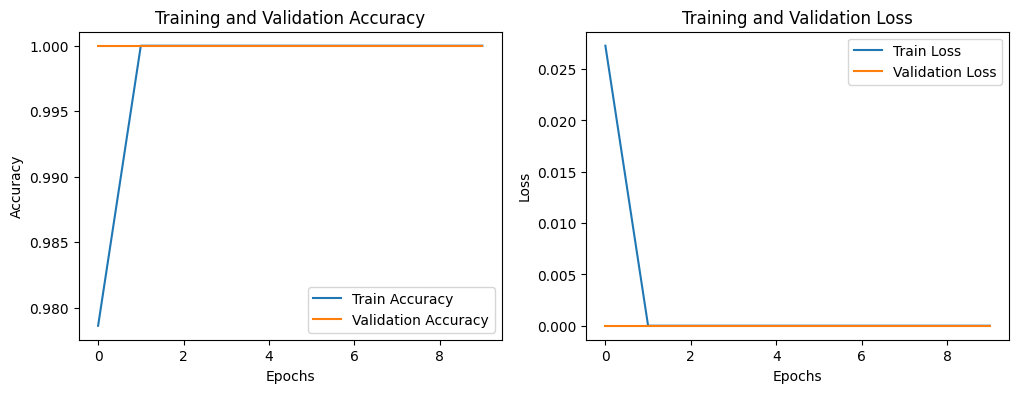

In [ ]:
#5. Evaluate Performance

import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

plt.show()


Using image: african_wildlife/test/images/4 (266).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted Class: images


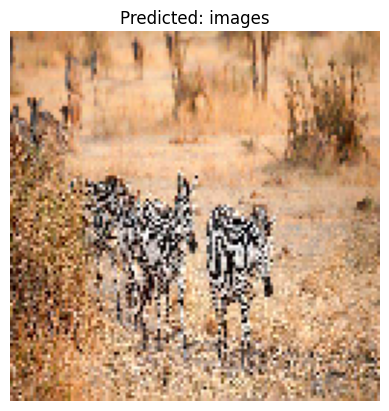

In [ ]:
#6. Make Predictions

import numpy as np
import glob
from tensorflow.keras.preprocessing import image

# Automatically find an image from the test dataset
image_files = glob.glob("african_wildlife/test/*/*.jpg")  # Adjust file format if needed

if image_files:
    img_path = image_files[0]  # Pick the first available image
    print(f"Using image: {img_path}")
else:
    raise FileNotFoundError("No images found in the test dataset!")

# Load and preprocess the image
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for model input

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Get class labels
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")

# Display the image
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.show()


In [ ]:
model.save("wildlife_cnn_model.h5")


In [ ]:
#Evaluate Model on Validation Data
# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"📊 Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"📉 Validation Loss: {val_loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 462ms/step - accuracy: 1.0000 - loss: 0.0000e+00
📊 Validation Accuracy: 100.00%
📉 Validation Loss: 0.0000


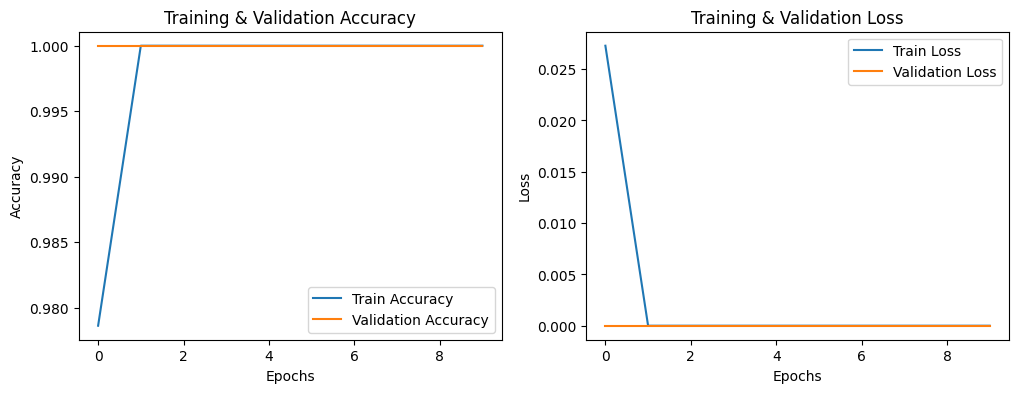

In [ ]:
#Plot Accuracy & Loss Curves
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()
